/tmp/ipykernel_10023/1163079036.py:89: DeprecationWarning: Please use `sum` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  area = measurements.sum(R, L, index=arange(L.max() + 1))


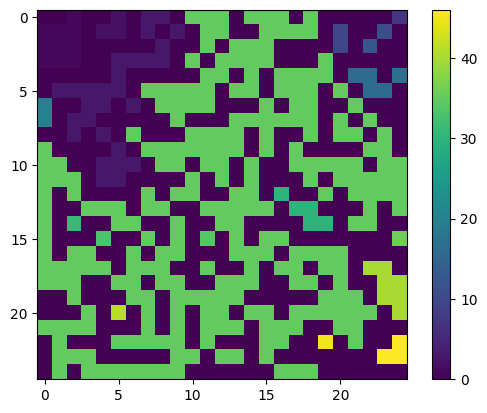

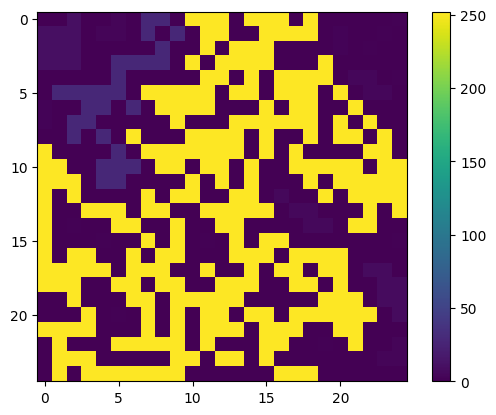

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.ndimage import measurements
matplotlib.style.use("default")
def R_matrix(L, p): #Создание матрицы из 0 и 1
 	return (np.random.choice([1, 0], p=(p, 1-p), size=(L, L))).astype(int64)



def Find(L, a, b, c, d, Lw):
    x = L[a, b]
    y = L[c, d]
    find_rc = Find_prim(L, x, Lw)
    row = find_rc[0]
    col = find_rc[1]

    for i in range(0, len(col)):
        aa = row[i]
        bb = col[i]
        L[aa, bb] = y
    return L


def Find_prim(a, b, Lw):
    size = a.shape
    row = np.array([], dtype=np.int64)
    col = np.array([], dtype=np.int64)
    for i in range(0, Lw):
        for j in range(0, Lw):
            if a[i, j] == b:
                row = np.append(row, i)
                col = np.append(col, j)
    return [[row], [col]]

        
def Label(L, R):
    iD = 1
    label = np.zeros((L, L))
    for i in range(0, L):
        for j in range(0, L):
            if R[i, j]:
                l_a = Above_left(i, j, R)
                above = l_a[0]
                left = l_a[1]

                if left == 0 and above == 0:
                    label[i, j] = iD
                    iD = iD + 1
                elif left == 1 and above == 0:
                    label[i, j] = label[i, j - 1]
                elif left == 0 and above == 1:
                    label[i, j] = label[i - 1, j]
                elif above == 2 and left == 2:
                    label[i, j] = label[i - 1, j - 1]
                # elif above == 3 and left == 3:
                #     label[i, j] = label[i + 1, j - 1]
                else:
                    Lab_prim = Find(label, i, j - 1, i - 1, j, L)
                    label = Lab_prim
                    label[i, j] = label[i - 1, j]

    return label


def Above_left(i, j, R):
    if i > 0 and j > 0:
        if R[i, j] == R[i - 1, j - 1]:
            above = 2
            left = 2
        # elif R[i, j] == R[i + 1, j - 1]:
        #     above = 3
        #     left = 3
        else:
            above = R[i - 1, j]
            left = R[i, j - 1]
    elif i > 0 and j == 0:
        above = R[i - 1, j]
        left = 0
    elif i == 0 and j > 0:
        above = 0
        left = R[i, j - 1]
    else:
        above = 0
        left = 0
    return (above, left)

def CalculateAreas(R, L):
    area = measurements.sum(R, L, index=arange(L.max() + 1))
    # print(area)
    areaImg = area[L]
    return areaImg


Lw = int(input())
p = 0.52
R = R_matrix(Lw, p)
L = Label(Lw, R)
Int = L.astype(int)
S = CalculateAreas(R, Int) # здесь хранится массив площади
# print(Int)
plt.imshow(Int)
plt.colorbar()
plt.show()
# print(S)
plt.imshow(S)
plt.colorbar()
plt.show()
